# Introduction to TensorFlow and Keras.

In [24]:
import tensorflow as tf

In [45]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

* Importing the Fashion MNIST Data Set

In [3]:
df = tf.keras.datasets.fashion_mnist
(xtrain, ytrain), (xtest, ytest) = df.load_data()

In [4]:
xtrain.shape

(60000, 28, 28)

* Extracting Validation data

In [6]:
X_val, X_train = xtrain[:4000], xtrain[4000:]
y_val, y_train = ytrain[:4000], ytrain[4000:]

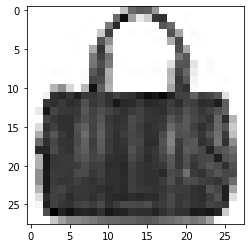

In [7]:
plt.imshow(X_train[0], cmap="binary")
plt.show()

In [8]:
ytrain[0]

9

# Model Building

* Sequential Model with 
* input layer will accept the image and flatten it to 784*1 array
* 3 hidden layers with 'relu' as activation Function.
* output layer will have 10 nodes for each class.

In [47]:
# Intializing the model

model = tf.keras.models.Sequential()

* Architecture of the Network

In [48]:
# Input Layer ensure that the input shape matches the features of the data set
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

# Hidden layers (Dense means every node in the present layer is connected to the every node in the previous Layers) 
model.add(tf.keras.layers.Dense(300, activation='relu'))
model.add(tf.keras.layers.Dense(150, activation='relu'))
#model.add(tf.keras.layers.Dense(60, activation='relu'))

# Output layer with number of node equal to the classes in the target feature. Softmax(mutli class), sigmoid (Binary class) 
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [49]:
# To check the details of the Network

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                1510      
Total params: 282,160
Trainable params: 282,160
Non-trainable params: 0
_________________________________________________________________


In [50]:
# Compiling the model
# Loss, here it is multi class but the target varaiable is (0-9) encoded so "sparse_categorical_crossentropy", 
# one-hot encoded then 'categorical_crossentropy'
# Optimizer, SGD, ADAM, RMSPROP
# Metrics - Classification : accuracy, if classes are imbalanced the use F1 score

model.compile(loss='sparse_categorical_crossentropy', optimizer = tf.keras.optimizers.SGD(lr=1e-3), metrics=['accuracy'])

In [51]:
# Training the model
# Epochs : no of times the whole dataset should go through the forward and backward propagtion in the network
# Batch size : no of observations to send into the network 
# Using the "history" varaible to keep track of training points

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Train on 56000 samples, validate on 4000 samples
Epoch 1/10
56000/56000 [==============================] - 25s 453us/sample - loss: 3.0590 - acc: 0.6697 - val_loss: 0.7374 - val_acc: 0.7207
Epoch 2/10
56000/56000 [==============================] - 24s 431us/sample - loss: 0.6680 - acc: 0.7234 - val_loss: 0.6922 - val_acc: 0.73356698 - a - ETA: 1s -
Epoch 3/10
56000/56000 [==============================] - 37s 660us/sample - loss: 0.6050 - acc: 0.7441 - val_loss: 0.6429 - val_acc: 0.7595
Epoch 4/10
56000/56000 [==============================] - 33s 583us/sample - loss: 0.5538 - acc: 0.7747 - val_loss: 0.6090 - val_acc: 0.7837
Epoch 5/10
56000/56000 [==============================] - 27s 485us/sample - loss: 0.5124 - acc: 0.7967 - val_loss: 0.5890 - val_acc: 0.7952 loss: 0
Epoch 6/10
56000/56000 [==============================] - 25s 444us/sample - loss: 0.4861 - acc: 0.8076 - val_loss: 0.5662 - val_acc: 0.7757
Epoch 7/10
56000/56000 [==============================] - 23s 417us/sample - 

<AxesSubplot:>

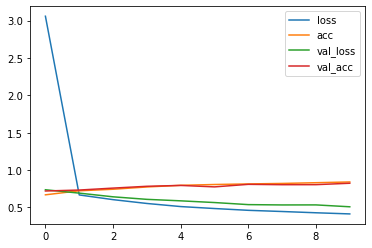

In [52]:
# Plotting the training graphs using history
pd.DataFrame(history.history).plot()

In [53]:
# Checking the scores on the test data.
model.evaluate(xtest, ytest)

10000/10000 [==============================] - 3s 258us/sample - loss: 0.4993 - acc: 0.8255s - loss: 0.5175 - acc: 0 - ETA: 0s - loss: 0.5056 - acc:  - ETA: 0s - loss: 0.5013 - acc: 0.


[0.4992628507614136, 0.8255]

In [54]:
# Understanding the Format of predictions done by the Network

In [55]:
x_new = xtest[:3]
y_new = ytest[:3]

In [56]:
model.predict(x_new)[0]

array([2.0017187e-10, 1.6186527e-14, 1.5063601e-11, 6.9163843e-18,
       4.6543411e-13, 5.4708093e-05, 1.6514710e-08, 2.7100777e-02,
       5.2539599e-09, 9.7284442e-01], dtype=float32)

In [57]:
np.round(model.predict(x_new))

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [58]:
y_new

array([9, 2, 1], dtype=uint8)

In [59]:
# Classes Predicted.
np.argmax(model.predict(x_new), axis=1)

array([9, 2, 1], dtype=int64)

In [60]:
# probablities with which the Prediction has been made.
np.max(model.predict(x_new), axis=1)

array([0.9728444 , 0.92349076, 1.        ], dtype=float32)

In [61]:
model.predict_classes(x_new)

array([9, 2, 1], dtype=int64)

# Scaling the data

In [63]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

In [64]:
x_train_scaled = ss.fit_transform(X_train.astype(np.float32).reshape(-1,28*28)).reshape(-1,28,28)
x_val_scaled = ss.transform(X_val.astype(np.float32).reshape(-1,28*28)).reshape(-1,28,28)
x_test_scaled = ss.transform(xtest.astype(np.float32).reshape(-1,28*28)).reshape(-1,28,28)

In [67]:
# Initializying the Model
model2 = tf.keras.models.Sequential()
# Input Layer
model2.add(tf.keras.layers.Flatten(input_shape = (28,28)))
# Hidden Layers
model2.add(tf.keras.layers.Dense(300, activation='relu'))
model2.add(tf.keras.layers.Dense(150, activation='relu'))
#model2.add(tf.keras.layers.Dense(60, activation='relu'))
# Output Layer
model2.add(tf.keras.layers.Dense(10, activation='softmax'))
# Compiler
model2.compile(loss='sparse_categorical_crossentropy', 
               optimizer = tf.keras.optimizers.SGD(lr = 1e-3), metrics=['accuracy'])

In [70]:
history = model2.fit(x_train_scaled, y_train, epochs=10, validation_data=(x_val_scaled, y_val))

Train on 56000 samples, validate on 4000 samples
Epoch 1/10
56000/56000 [==============================] - 29s 526us/sample - loss: 0.9433 - acc: 0.6924 - val_loss: 0.6431 - val_acc: 0.7768- acc: 0.64 - ETA: 10s -  - ETA: 6s - loss: 1.02 - ETA: 5s - loss: 1.0096 - ac - ETA: 4s - loss: 1.0013 - ac - ETA: 4s - l
Epoch 2/10
56000/56000 [==============================] - 27s 481us/sample - loss: 0.5771 - acc: 0.7977 - val_loss: 0.5399 - val_acc: 0.8140
Epoch 3/10
56000/56000 [==============================] - 29s 519us/sample - loss: 0.5040 - acc: 0.8222 - val_loss: 0.4929 - val_acc: 0.8290
Epoch 4/10
56000/56000 [==============================] - 29s 522us/sample - loss: 0.4648 - acc: 0.8360 - val_loss: 0.4634 - val_acc: 0.8360s - loss: 0.4657 - a - ETA: 0s - loss: 0.4650 - ac - ETA: 0s - loss: 0.4646 - acc: 0.8
Epoch 5/10
56000/56000 [==============================] - 27s 481us/sample - loss: 0.4388 - acc: 0.8440 - val_loss: 0.4450 - val_acc: 0.8432
Epoch 6/10
56000/56000 [==============

<AxesSubplot:>

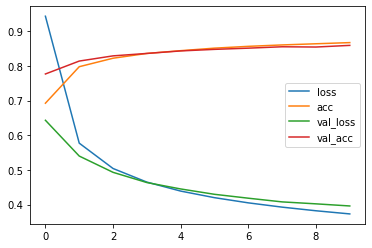

In [71]:
pd.DataFrame(history.history).plot()

# Callbacks

In [74]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(150, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
    
])

In [78]:
model.compile(loss ='sparse_categorical_crossentropy',
             optimizer =tf.keras.optimizers.SGD(lr=1e-3),
             metrics=['accuracy'])

#logdir = os.path.join(root_logdir, 'run_{}'.format(time.time()))
callbacks = [
            tf.keras.callbacks.EarlyStopping(patience =3)] 

history = model.fit(x_train_scaled, y_train, validation_data = (x_val_scaled, y_val), epochs =50,
                   callbacks=callbacks)

Train on 56000 samples, validate on 4000 samples
Epoch 1/50
56000/56000 [==============================] - 25s 440us/sample - loss: 0.9633 - acc: 0.6836 - val_loss: 0.6592 - val_acc: 0.7790ss: 0.973
Epoch 2/50
56000/56000 [==============================] - 25s 448us/sample - loss: 0.5883 - acc: 0.7950 - val_loss: 0.5521 - val_acc: 0.8115
Epoch 3/50
56000/56000 [==============================] - 26s 462us/sample - loss: 0.5128 - acc: 0.8180 - val_loss: 0.5028 - val_acc: 0.8292: 0.513 - ET
Epoch 4/50
56000/56000 [==============================] - 25s 454us/sample - loss: 0.4718 - acc: 0.8320 - val_loss: 0.4740 - val_acc: 0.8385s - loss: 0 - ETA: - ETA: 3s - loss - ETA
Epoch 5/50
56000/56000 [==============================] - 26s 457us/sample - loss: 0.4445 - acc: 0.8415 - val_loss: 0.4541 - val_acc: 0.8455
Epoch 6/50
56000/56000 [==============================] - 27s 481us/sample - loss: 0.4246 - acc: 0.8487 - val_loss: 0.4397 - val_acc: 0.84950.847 - ETA: 6s - loss: 0.4262 - acc: 0 - ET

<AxesSubplot:>

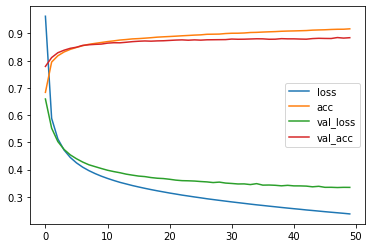

In [79]:
pd.DataFrame(history.history).plot()